In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name = "data")

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# EDA

In [ ]:
data.shape

(3999, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

There are no missing values.

In [ ]:
data.nunique()

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

Award is target column, lets drop.

In [4]:
data.drop(["ID#", "Award?"], axis = 1, inplace = True)

In [5]:
data.shape

(3999, 10)

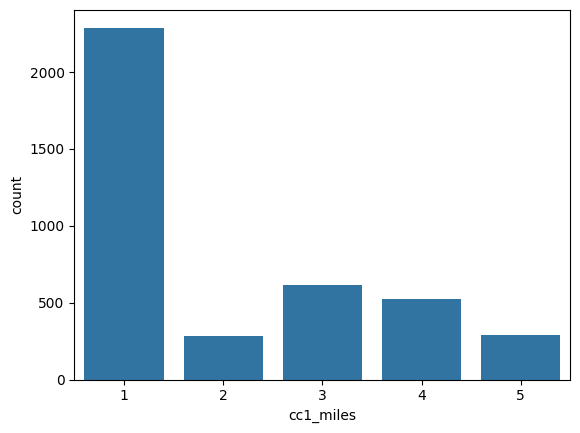

In [ ]:
sns.countplot(x='cc1_miles', data=data)
plt.show()

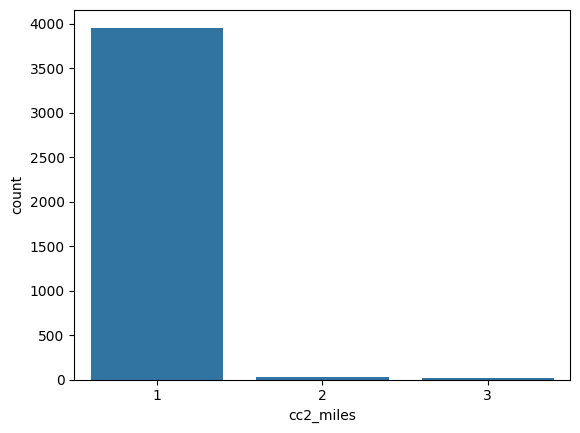

In [ ]:
sns.countplot(x='cc2_miles', data=data)
plt.show()

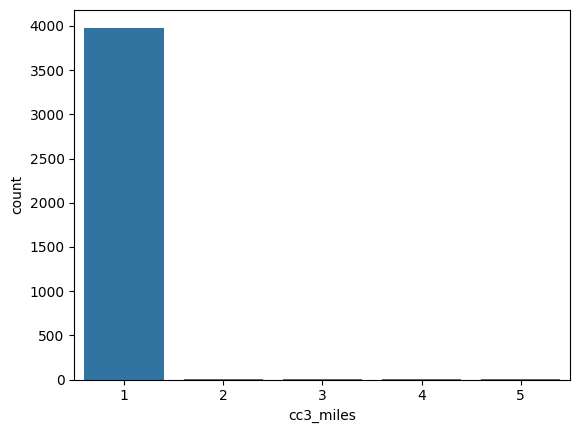

In [ ]:
sns.countplot(x='cc3_miles', data=data)
plt.show()

In [ ]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


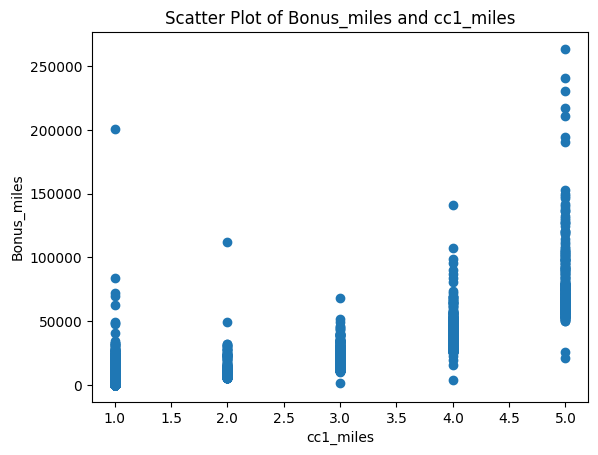

In [ ]:
#scatter plot for cc1_miles and Bonus_miles
plt.scatter(data['cc1_miles'], data['Bonus_miles'])
plt.xlabel("cc1_miles")
plt.ylabel("Bonus_miles")
plt.title("Scatter Plot of Bonus_miles and cc1_miles")
plt.show()


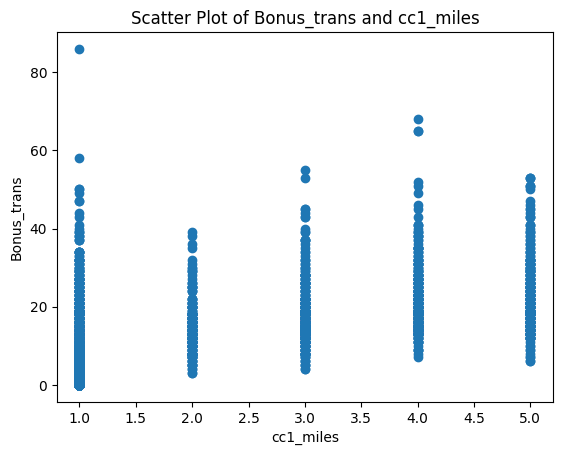

In [ ]:
#scatter plot for cc1_miles and Bonus_miles
plt.scatter(data['cc1_miles'], data['Bonus_trans'])
plt.xlabel("cc1_miles")
plt.ylabel("Bonus_trans")
plt.title("Scatter Plot of Bonus_trans and cc1_miles")
plt.show()


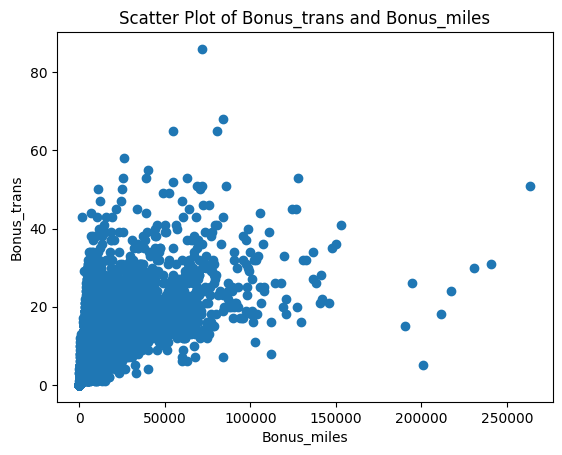

In [ ]:
#scatter plot for cc1_miles and Bonus_miles
plt.scatter(data['Bonus_miles'], data['Bonus_trans'])
plt.xlabel("Bonus_miles")
plt.ylabel("Bonus_trans")
plt.title("Scatter Plot of Bonus_trans and Bonus_miles")
plt.show()


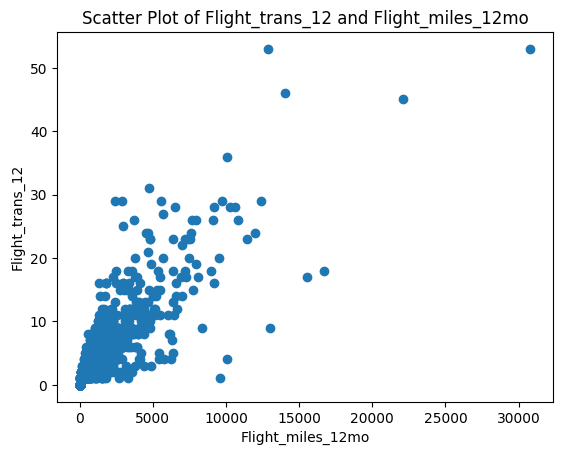

In [ ]:
#scatter plot for cc1_miles and Bonus_miles
plt.scatter(data['Flight_miles_12mo'], data['Flight_trans_12'])
plt.xlabel("Flight_miles_12mo")
plt.ylabel("Flight_trans_12")
plt.title("Scatter Plot of Flight_trans_12 and Flight_miles_12mo")
plt.show()


<Axes: >

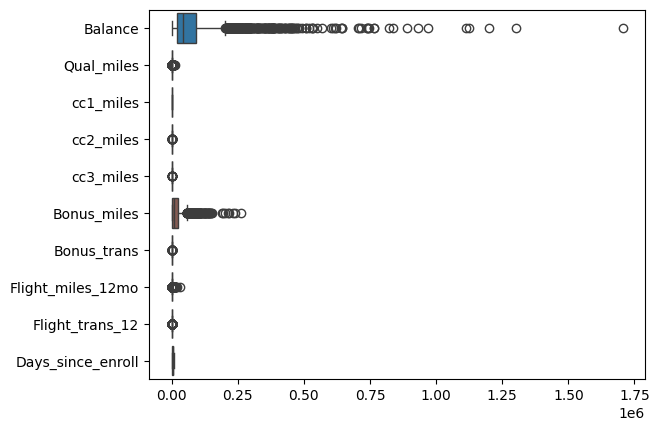

In [ ]:
sns.boxplot(data, orient = "h")

In [ ]:
data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000


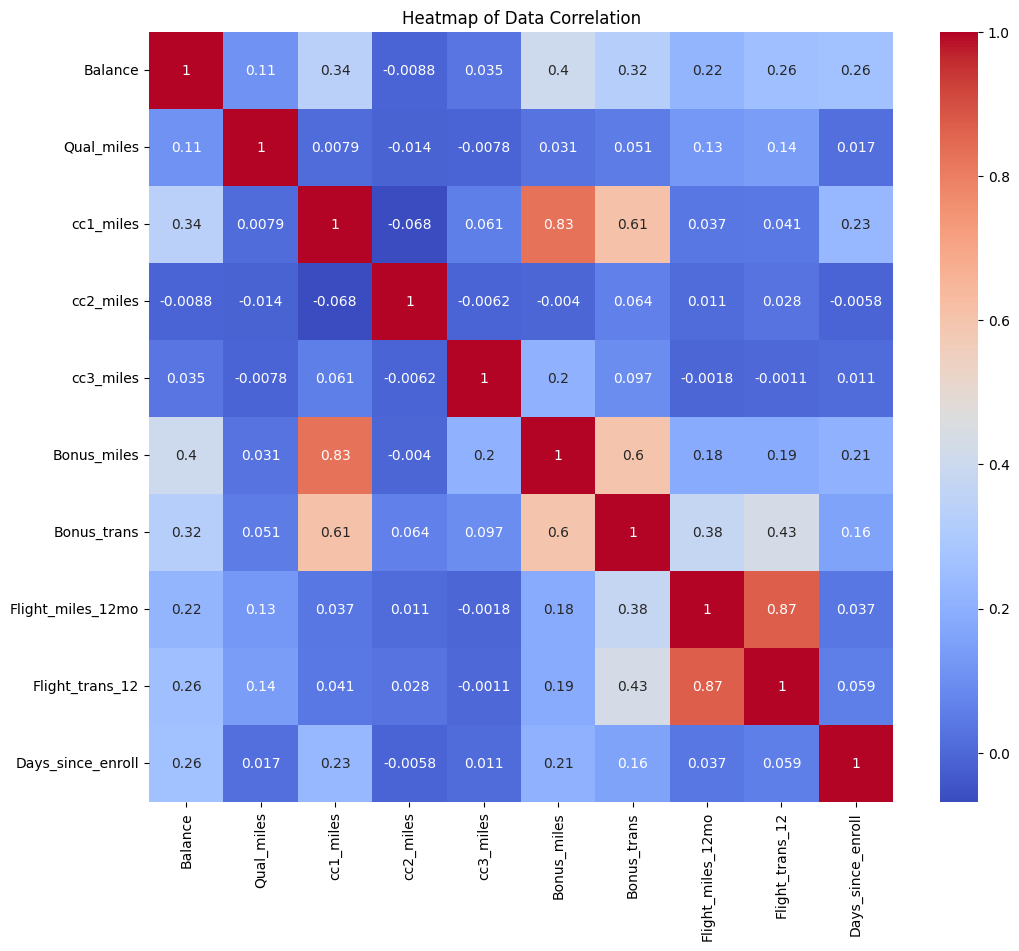

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Data Correlation', fontsize=12)
plt.show()

COLUMNS WITH STRONG POSITIVE CORRELATION,


1. CC1_Miles - Bonus_Mines
2. CC1_Miles - Bonus_Trans
3. Bonus_Mines - Bonus_Trans
4. Flight_miles_12mo - Flight_trans_12

**Standardisation**

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
s_data= sc.fit_transform(data[['Balance','Qual_miles', 'Bonus_miles', 'Bonus_trans','Flight_miles_12mo', 'Flight_trans_12' , 'Days_since_enroll']])

In [7]:
s_data = pd.DataFrame(s_data)
s_data.columns= ['Balance','Qual_miles', 'Bonus_miles', 'Bonus_trans','Flight_miles_12mo', 'Flight_trans_12' , 'Days_since_enroll']
s_data.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.083121,1.499394,1.154932,0.692490,1.363975


In [8]:
c_data = data[['cc1_miles', 'cc2_miles', 'cc3_miles']]
c_data.head()

,cc1_miles,cc2_miles,cc3_miles
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,4,1,1


In [9]:
new_data = pd.concat([s_data, c_data], axis=1)
new_data.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles
0,-0.451141,-0.186299,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,1,1,1
1,-0.539457,-0.186299,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,1,1,1
2,-0.320031,-0.186299,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,1,1,1
3,-0.583799,-0.186299,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,1,1,1
4,0.239678,-0.186299,1.083121,1.499394,1.154932,0.692490,1.363975,4,1,1


# KMEANS CLUSTERING

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

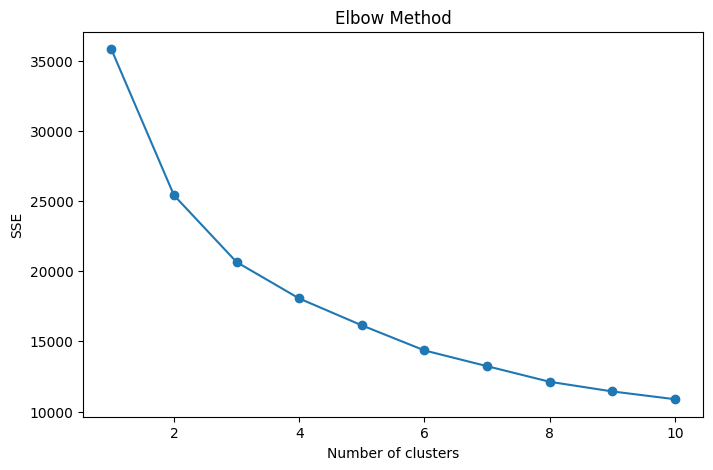

In [10]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(new_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

optimal clusters are 3



In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
new_data['Kmeans-Cluster'] = y_kmeans

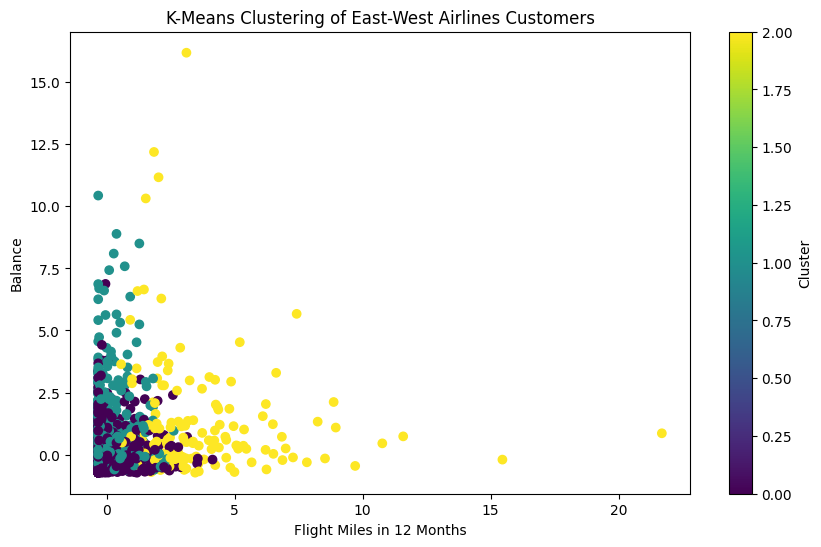

Clustering and visualization done.


In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(new_data['Flight_miles_12mo'], new_data['Balance'], c=new_data['Kmeans-Cluster'], cmap='viridis')
plt.title('K-Means Clustering of East-West Airlines Customers')
plt.xlabel('Flight Miles in 12 Months')
plt.ylabel('Balance')
plt.colorbar(label='Cluster')
plt.show()

print('Clustering and visualization done.')

In [23]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(new_data.drop(['Kmeans-Cluster', 'Agglomerative_Cluster'], axis=1), y_kmeans)
print("Silhouette Score for K-Means Clustering: ", kmeans_silhouette)

Silhouette Score for K-Means Clustering:  0.39280481964512054


# DB SCAN CLUSTERING

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [18]:
# Select numerical columns for DBSCAN
numerical_columns = ['Balance', 'Flight_miles_12mo']
X = new_data[numerical_columns].values

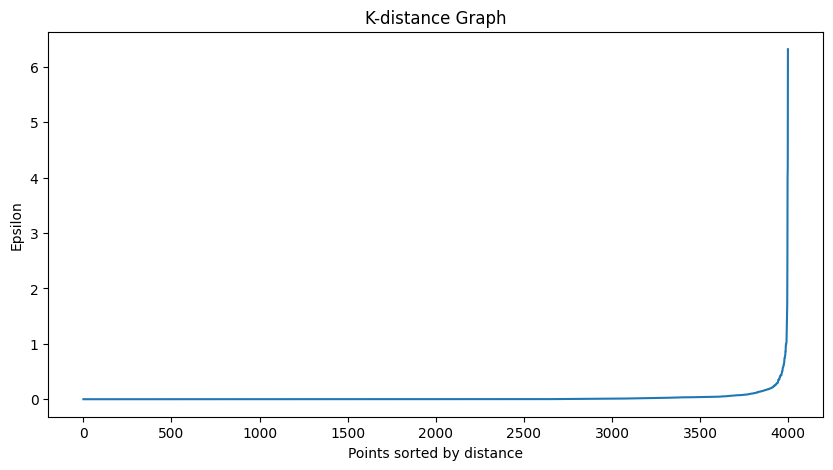

In [19]:
# Compute the k-distance graph
neigh = NearestNeighbors(n_neighbors=2)
nbrs_distances, nbrs_indices = neigh.fit(X).kneighbors(X)
distances = nbrs_distances[:, 1]
distances = np.sort(distances, axis=0)

# Plot k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [20]:
# Choose epsilon based on the k-distance graph
epsilon = 0.5

# Perform DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=5)
clusters = dbscan.fit_predict(X)

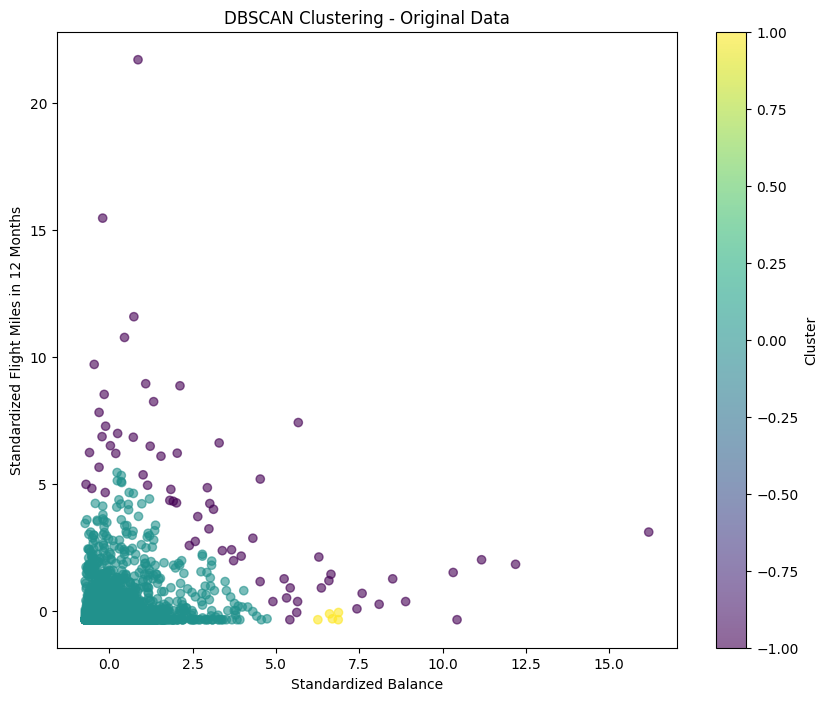

In [21]:
# Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('DBSCAN Clustering - Original Data')
plt.xlabel('Standardized Balance')
plt.ylabel('Standardized Flight Miles in 12 Months')
plt.show()

In [22]:
# Print number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

Number of clusters: 2
Number of noise points: 67


In [25]:
# Calculate Silhouette Score for DBSCAN
silhouette_dbscan = silhouette_score(X, clusters)
print("Silhouette Score for DBSCAN Clustering:", silhouette_dbscan)

Silhouette Score for DBSCAN Clustering: 0.8258405879980671


# HEIRARCHICAL CLUSTERING

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Using Ward linkage
matrix = linkage(new_data, method='ward')

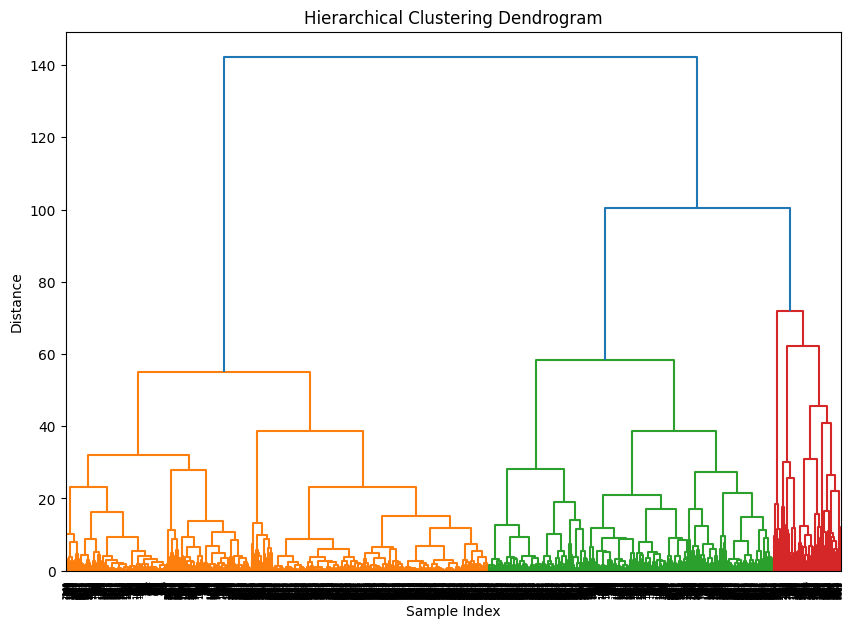

In [28]:
plt.figure(figsize=(10, 7))
dendrogram(matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [30]:
from scipy.cluster.hierarchy import fcluster
max_d = 140
clusters = fcluster(matrix, max_d, criterion='distance')
n_clusters = len(np.unique(clusters))
print(f"Number of clusters: {n_clusters}")

Number of clusters: 2


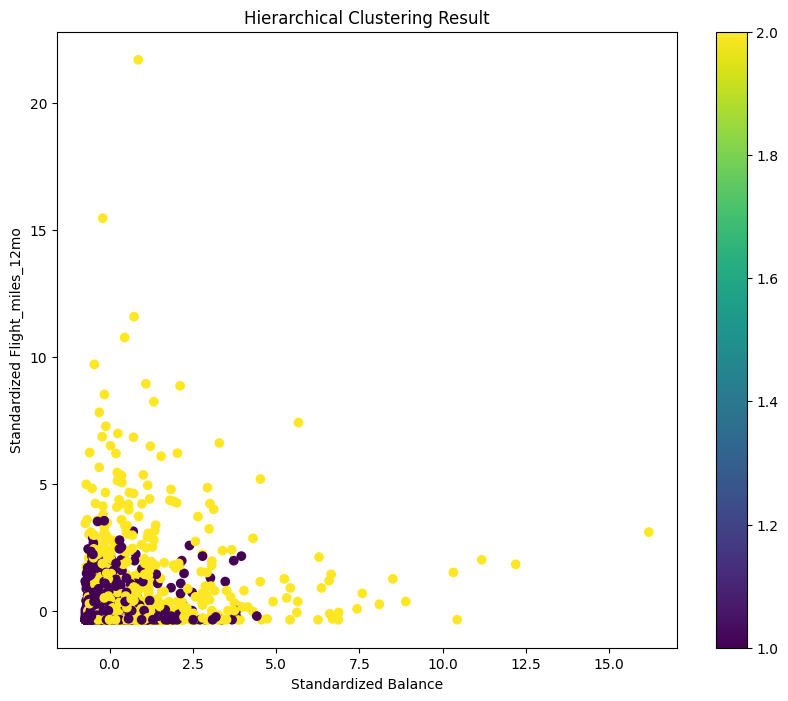

In [31]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(new_data['Balance'], new_data['Flight_miles_12mo'], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('Hierarchical Clustering Result')
plt.xlabel('Standardized Balance')
plt.ylabel('Standardized Flight_miles_12mo')
plt.show()

In [32]:
# Calculate Silhouette Score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(new_data, clusters)
print("Silhouette Score of Hierarchical Clustering:", silhouette_hierarchical)

Silhouette Score of Hierarchical Clustering: 0.33156891174785885


K-Means is performing best.